In [ ]:
#This widget uses the ipympl package to add interactivity to the plots.
%matplotlib widget 

#Pandas will be used to handel our data. It uses dataframes formatted like spreadsheets making it easy to read.
import pandas as pd

#USER INPUT REQUIRED HERE#
# load dataset into Pandas DataFrame and print it out to have a look at it. 
# You can check here to make sure it looks correct. 
df = pd.read_csv('input/NAA_Data2.csv') #Here you must spesify a file path to the file to be loaded. Include file name and extensions. EG.'input/NAA_Data.csv' 
print (df)

In [2]:
#USER INPUT REQUIRED HERE#
#Choose a Target label to colour our PCA by and look for clusters. This should be a column in th that we are not fitting.
Target = 'Time period'

#USER INPUT REQUIRED HERE#
# Get the list of all column names from headers. These will be our features for the PCA. 
#Slice off any headers that are not features (targets lables etc)
features = list(df.columns.values)[6:]   #You MUST slice off the unused cols here double check the number each time.
#Print the feature list to make sure it looks as expected and no unwanted columns have made it in.
print("Features :", features)

# Separating out the features. This makes a new np array with only the values we want to fit the PCA to.
x = df.loc[:, features].values

# Separating out the target. This makes a new np array with only the values we want to use as labels or targets to colour our Plot with.
y = df.loc[:,[Target]].values



Features : ['Al', 'As', 'Ba', 'Ca', 'Ce', 'Co', 'Cr', 'Cs', 'Dy', 'Eu', 'Fe', 'Hf', 'La', 'Mg', 'Mn', 'Na', 'Nd', 'Rb', 'Sb', 'Sc', 'Sm', 'Sr', 'Ta', 'Tb', 'Th', 'Ti', 'V', 'Yb', 'Zn']


## Data Transformations

Principal component analysis requires the data you input to be standardized. If this is not done the variances observed may relate to differences in the underlying unit scales of the different data sources and not true variances within their distributions. For example, 10km might be a very large distance number in our dataset whilst 10 degrees Celsius is a cold temperature number. These will both look like the same value to the PCA if they are not standardized relative to their own feature ranges.

We may have collected all our data in the same unit. Standardization is still appropriate as we are looking at an analysis of variance rather than of magnitude. For example, one element may be found to fall between 1000 and 1005 parts per million and another element might fall between 0 and 5 parts per million. They have the same variance, but they will look very different if they are not standardized first.

There are three approaches that may be applicable here (Baxter 1995):


**Standardized Raw data**
This approach uses the standardization formular also known as 'z-score normalization'. This formular is:
    
    TransformedValue = (OriginalValue - Mean)/StandardDeviation

This technique scales the values of a feature to have a mean of 0 and a standard deviation of 1. This is the most common approach to general PCA analysis (outside of achaeometry which uses LOG10 transfom).


**Rank-transformed data**
This approach gives each value within a column its rank relative to the other values in the column. So for example a feature with 10 unique value (any values) will end up with values numbering 1 through 10. The order of these will be based on the original place. The largest value is still the biggest but the order of magnitude is lost. For example the set [1, 5, 1000] become the set [1, 2, 3] note that where there was orginaly a 995 magnitude difference betwee the last two numbers there is now only a difference of 1, but the largest is still the largest. This is great for handeling outliers (Baxter 1995). Where ties occur (a data set has multiple identical numbers) this can be handelend a number of ways but most typical is to give the average rank to those ties. So if there were three values tied for ranks 4, 5, and 6 they would all be given the average of those ranks (rank 5).  

**Unstandardized logarithmically transformed data**
This approach takes the Logarith (Base 10) for each value. This is a nonlinear transfomation and is very good and handeling outliers. This approach has been commonly used 

**Standardized logarithmically transformed data**

In [3]:
import numpy as np
import math
from numpy import errstate,isneginf,array

#PCA requires the data be scaled or standardized.We import the standardScaler for use later.
from sklearn.preprocessing import StandardScaler
print('Original Data')
print(x)


#Rank transform the features
#USER: Unhash the following line if you want to use the Rank transform.
# x = df.loc[:, features].rank(axis=0, method='average').values

#Log10 Transform the features
#USER: Unhash the following 4 lines if you want to use the Log10 transform.
np.seterr(divide='ignore', invalid='ignore') #We need to make exception for divide by zero errors just incase there are zeros in the data.
x = np.log10(x)           #This is the elementwise log10 Transformation. This will produce -inf for divide by zero errors.
x[isneginf(x)]=0.0          #This replaces all -inf values with zeros but can sometimes produce nans
x = np.nan_to_num(x, nan=0.0,)  #This catches any nans and replaces with zeros.

# Standardizing the features
#USER: Unhash the following line if you want to use the standardize transform. You can unhash this after the Log10 if you want.
x = StandardScaler().fit_transform(x)  
           
print('Transformed Data')
print(x)

Original Data
[[8.181e+04 1.812e+01 6.276e+02 ... 9.648e+01 1.643e+00 9.205e+01]
 [8.796e+04 1.410e+01 6.488e+02 ... 1.385e+02 1.934e+00 1.112e+02]
 [8.514e+04 1.004e+01 6.555e+02 ... 1.414e+02 1.723e+00 9.138e+01]
 ...
 [7.838e+04 1.522e+01 7.991e+02 ... 1.169e+02 1.682e+00 1.037e+02]
 [8.586e+04 1.736e+01 0.000e+00 ... 2.888e+02 2.072e+00 2.376e+02]
 [7.621e+04 2.300e+01 5.123e+02 ... 1.101e+02 1.905e+00 8.313e+01]]
Transformed Data
[[ 1.80918256e-01 -2.73014342e-01  1.68819559e-01 ... -3.97408561e-01
  -5.06821576e-01 -2.09126833e-03]
 [ 1.18065936e+00 -8.06211270e-01  2.00734312e-01 ...  7.21789942e-01
   5.26025171e-01  7.72558563e-01]
 [ 7.31217246e-01 -1.52807125e+00  2.10604005e-01 ...  7.85940125e-01
  -2.05688371e-01 -3.20334538e-02]
 ...
 [-4.09838103e-01 -6.43737347e-01  4.00900245e-01 ...  1.96911435e-01
  -3.58230115e-01  4.86352787e-01]
 [ 8.47368059e-01 -3.64092588e-01 -6.01969875e+00 ...  2.99670027e+00
   9.62582213e-01  3.88453734e+00]
 [-7.97086979e-01  2.33902138e-

In [4]:
from sklearn.decomposition import PCA
np.seterr(divide='ignore', invalid='ignore')
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

In [5]:
finalDf = pd.concat([principalDf, df[[Target]]], axis = 1)
print (finalDf)
print (pca.components_)
print (pca.components_.T)

    Principal Component 1  Principal Component 2  Principal Component 3  \
0               -1.726683               0.666856               0.317804   
1                2.478287               0.530845               1.749450   
2                0.592255              -1.018272               1.061990   
3                6.855682               0.278427               5.022359   
4                0.446935              -1.071732              -0.225794   
5               -3.217057               0.142954               0.828002   
6                2.168078               0.003847               0.279880   
7                1.621646               2.510826               4.326643   
8                0.055006              -0.664394              -0.349969   
9               -3.151057              -1.371804               0.080042   
10               4.389624               1.783166               2.330011   
11               1.671225               0.064574               0.207638   
12               0.981488

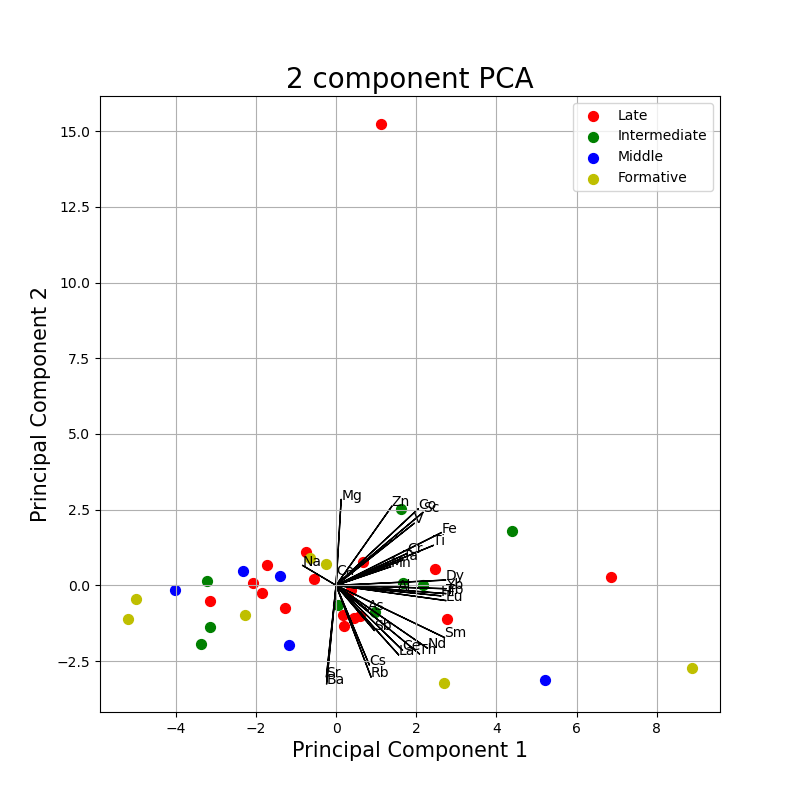

In [8]:
import matplotlib.pyplot as plt

PCX = 1
PCY = 2
PCZ = 3

xAxis = ('Principal Component ' + str(PCX))
yAxis = ('Principal Component ' + str(PCY))
zAxis = ('Principal Component ' + str(PCZ))

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(xAxis, fontsize = 15)
ax.set_ylabel(yAxis, fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# targets = ['Quebrada Chaca', 'Lluta Valley', 'Highlands','Arica', 'Azapa Valley']
targets = finalDf[finalDf.columns[-1]].unique()

colors = ['r', 'g', 'b', 'y','m']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf[Target] == target
    ax.scatter(finalDf.loc[indicesToKeep, xAxis]
               , finalDf.loc[indicesToKeep, yAxis]
               , c = color
               , s = 50)
    
loadings = pca.components_

exaggerateAaxis = 10
ArrowHeadSize =  0.01
for i, v in enumerate(loadings.T):
    ax.arrow(0, 0, v[(PCX-1)]*exaggerateAaxis, v[(PCY-1)]*exaggerateAaxis, head_width=ArrowHeadSize, head_length=ArrowHeadSize)
    ax.text(v[(PCX-1)] * exaggerateAaxis, v[(PCY-1)] * exaggerateAaxis, features[i], size=10)
    
ax.legend(targets)
ax.grid()

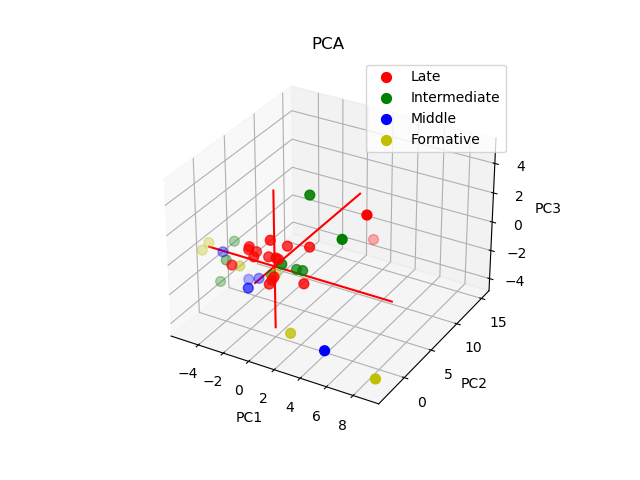

In [7]:
# Plot initialisation
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

targets = finalDf[finalDf.columns[-1]].unique()


colors = ['r', 'g', 'b', 'y','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[Target] == target
    ax.scatter(finalDf.loc[indicesToKeep, xAxis]
               , finalDf.loc[indicesToKeep, yAxis]
               , finalDf.loc[indicesToKeep, zAxis]
               , c = color
               , s = 50)
    
# ax.scatter(finalDf['Principal Component 1'], finalDf['Principal Component 2'], finalDf['Principal Component 3'], c='r', cmap="Set2_r", s=60)


# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf['Principal Component 1']), max(finalDf['Principal Component 1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf['Principal Component 2']), max(finalDf['Principal Component 2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(finalDf['Principal Component 3']), max(finalDf['Principal Component 3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA")
ax.legend(targets)
plt.show()